In [68]:
!pip install kneed --q

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from kneed import KneeLocator
import pandas as pd


In [70]:
df = pd.read_csv("https://raw.githubusercontent.com/anirbanghoshsbi/data/main/data_fundamental.csv")
df.reset_index(inplace=True)
# Distance from the moving averages
for m in [10, 20, 30, 50, 100]:
    df[f'feat_dist_from_ma_{m}'] = df['Div Yield']/df['Div Yield'].rolling(m).mean()-1


# Price distance
for m in [1, 2, 3, 4, 5, 10, 15, 20, 30, 50, 100]:
    df[f'feat_price_dist_{m}'] = df['Div Yield']/df['Div Yield'].shift(m)-1

In [71]:
df = df.dropna()
df_train = df.reset_index(drop=True)
df_train = df[df['Date'] < '2020-01-01'].reset_index(drop=True)
df_test = df[df['Date'] >= '2020-01-01'].reset_index(drop=True)


feat_cols = [col for col in df.columns if 'feat' in col]

## Begin Clustering Efforts

Optimal k: 7


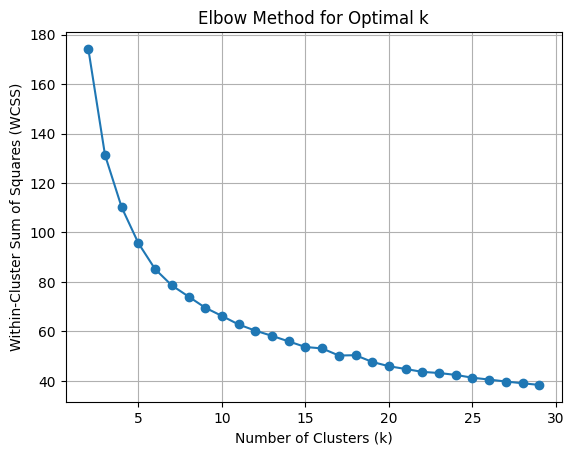

In [72]:
x_train = df_train[feat_cols]

wcss = []
k_range = range(2, 30)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

elbow_locator = KneeLocator(k_range, wcss, curve='convex', direction='decreasing')
optimal_k = elbow_locator.elbow

print(f'Optimal k: {optimal_k}')

plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
optimal_kmeans.fit(x_train)

df_train['cluster'] = optimal_kmeans.predict(x_train)

In [73]:
import plotly.express as px

df_plot = df_train[df_train['Date'] > '2017-01-01']

fig = px.scatter(
    df_plot,
    x='Date',
    y='Close',
    color='cluster',
    color_continuous_scale='viridis',
    title='Cluster Analysis - Training',
)

# Customize the axis labels
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close')

# Show the plot
fig.show()

In [74]:
fig = px.scatter(
    df_plot,
    x='Date',
    y='Div Yield',
    color='cluster',
    color_continuous_scale='viridis',
    title='Cluster Analysis - Training',
)

# Customize the axis labels
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close')

# Show the plot
fig.show()

In [75]:
df_test['cluster'] = optimal_kmeans.predict(df_test[feat_cols])

fig = px.scatter(
    df_test,
    x='Date',
    y='Close',
    color='cluster',
    color_continuous_scale='viridis',
    title='Cluster Analysis - Testing',
)

# Customize the axis labels
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close')

# Show the plot
fig.show()

In [76]:
df_test['cluster'] = optimal_kmeans.predict(df_test[feat_cols])

fig = px.scatter(
    df_test,
    x='Date',
    y='Div Yield',
    color='cluster',
    color_continuous_scale='viridis',
    title='Cluster Analysis - Testing',
)

# Customize the axis labels
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Div Yield Higher Better')

# Show the plot
fig.show()

In [88]:
good_cluster=[0,2]

In [89]:
fig = px.scatter(
    df_test,
    x='Date',
    y='Close',
    color='cluster',
    color_continuous_scale='viridis',
    title='Cluster Analysis - Training',
)

# Customize the axis labels
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close')

# Show the plot
fig.show()

In [90]:
df_test['good_cluster'] = np.where(df_test['cluster'].isin(good_cluster),0,1)

In [91]:
fig = px.scatter(
    df_test,
    x='Date',
    y='Close',
    color='good_cluster',
    color_continuous_scale='cividis',
    title='Cluster Analysis - Training',
)

# Customize the axis labels
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close')

# Show the plot
fig.show()